In [ ]:
import pandas as pd
import matplotlib.pyplot as plt  # Para plotar graficos
import numpy as np  # Array do Python
import math
from math  import sqrt, pi
import tensorflow as tf
from tensorflow import keras

In [ ]:
#train data 생성
np.random.seed(100)
data=[]
data=pd.DataFrame(np.random.uniform(0,3,100))
data['x2']=pd.DataFrame(np.random.uniform(2,4,100))
data['x3']=pd.DataFrame(np.random.uniform(-2,2,100))
data['trian']=pd.DataFrame(np.random.triangular(-2,0,2,100))
data['x4']=1/3*data['x3']+2/3*data['trian']
data.columns=['x1','x2','x3','dr','x4']
train=data.drop('dr',axis=1)
#y 만들기
noise = np.random.normal(0, 0.5, size=100)
train_y=-data['x1']+2*data['x2']-0.5*((1/(2**(1/2))*data['x3'])+(1/(2**(1/2))*data['x4'])-(1/(2**(1/2))))**2+6
train_y_noise=train_y+noise
train_y_noise=pd.DataFrame(train_y_noise, columns=['target'])

In [ ]:
#test data 생성
np.random.seed(1)
data=[]
data=pd.DataFrame(np.random.uniform(0,3,100))
data['x2']=pd.DataFrame(np.random.uniform(2,4,100))
data['x3']=pd.DataFrame(np.random.uniform(-2,2,100))
data['trian']=pd.DataFrame(np.random.triangular(-2,0,2,100))
data['x4']=1/3*data['x3']+2/3*data['trian']
data.columns=['x1','x2','x3','dr','x4']
test=data.drop('dr',axis=1)
#y 만들기
noise = np.random.normal(0, 0.5, size=100)
test_y=-data['x1']+2*data['x2']-0.5*((1/(2**(1/2))*data['x3'])+(1/(2**(1/2))*data['x4'])-(1/(2**(1/2))))**2+6
test_y_noise=test_y+noise
test_y_noise=pd.DataFrame(test_y_noise, columns=['target'])

In [ ]:
#분리
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(train,train_y, random_state=777)

In [ ]:
# Defining the Mexican Hat Wavelet Function
def mexican(z):
    return tf.multiply(tf.multiply(tf.multiply(2/sqrt(3),tf.pow(pi,-0.25)),tf.subtract(tf.constant(1.0), tf.pow(z,2))), tf.exp(tf.multiply(tf.constant(-0.5), tf.pow(z,2))))

In [ ]:
#임의로 케라스 모델 생성
tf.random.set_seed(77)
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3,input_shape=[4]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [ ]:
#클래스의 객체를 생성
tf.random.set_seed(77)
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)
keras_reg.fit(x_train, y_train, epochs=100,
              validation_data=(x_test, y_test),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
3/3 [==============================] - 0s 58ms/step - loss: 91.3961 - val_loss: 39.9800
Epoch 2/100
3/3 [==============================] - 0s 10ms/step - loss: 33.0390 - val_loss: 11.0239
Epoch 3/100
3/3 [==============================] - 0s 11ms/step - loss: 8.5233 - val_loss: 4.4965
Epoch 4/100
3/3 [==============================] - 0s 9ms/step - loss: 4.3329 - val_loss: 3.5015
Epoch 5/100
3/3 [==============================] - 0s 10ms/step - loss: 3.7461 - val_loss: 3.3533
Epoch 6/100
3/3 [==============================] - 0s 12ms/step - loss: 3.5270 - val_loss: 2.9903
Epoch 7/100
3/3 [==============================] - 0s 12ms/step - loss: 3.2450 - val_loss: 2.9564
Epoch 8/100
3/3 [==============================] - 0s 10ms/step - loss: 3.0134 - val_loss: 2.6868
Epoch 9/100
3/3 [==============================] - 0s 10ms/step - loss: 2.7619 - val_loss: 2.5942
Epoch 10/100
3/3 [==============================] - 0s 11ms/step - loss: 2.5808 - val_loss: 2.2609
Epoch 11/100
3/3

In [ ]:
#RandomizedsearchCV를 이용하여 하이퍼파라미터 공간을 탐색한다.
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV
tf.random.set_seed(77)
param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(2, 15).tolist(),
    "learning_rate": reciprocal(3e-4, 3e-2).rvs(1000).tolist(),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, scoring='neg_mean_absolute_error', n_iter=10, cv=3, verbose=2)
rnd_search_cv.fit(x_train, y_train, epochs=100,
                  validation_data=(x_test, y_test),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] n_neurons=9, n_hidden=3, learning_rate=0.0004051580153583006 ....


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Epoch 1/100
2/2 [==============================] - 0s 125ms/step - loss: 105.0807 - val_loss: 88.9460
Epoch 2/100
2/2 [==============================] - 0s 18ms/step - loss: 101.1041 - val_loss: 85.7515
Epoch 3/100
2/2 [==============================] - 0s 26ms/step - loss: 97.0712 - val_loss: 82.5062
Epoch 4/100
2/2 [==============================] - 0s 18ms/step - loss: 92.9404 - val_loss: 79.1705
Epoch 5/100
2/2 [==============================] - 0s 20ms/step - loss: 88.6760 - val_loss: 75.5723
Epoch 6/100
2/2 [==============================] - 0s 19ms/step - loss: 84.0515 - val_loss: 71.8969
Epoch 7/100
2/2 [==============================] - 0s 21ms/step - loss: 79.3527 - val_loss: 68.3263
Epoch 8/100
2/2 [==============================] - 0s 19ms/step - loss: 74.7304 - val_loss: 64.5170
Epoch 9/100
2/2 [==============================] - 0s 19ms/step - loss: 70.0116 - val_loss: 60.5746
Epoch 10/100
2/2 [==============================] - 0s 18ms/step - loss: 65.0529 - val_loss: 56.0

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.8s remaining:    0.0s


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Epoch 87/100
2/2 [==============================] - 0s 27ms/step - loss: 2.2115 - val_loss: 2.0496
Epoch 88/100
2/2 [==============================] - 0s 25ms/step - loss: 2.2103 - val_loss: 2.0987
Epoch 89/100
2/2 [==============================] - 0s 20ms/step - loss: 2.1733 - val_loss: 2.0918
Epoch 90/100
2/2 [==============================] - 0s 26ms/step - loss: 2.1749 - val_loss: 2.0022
Epoch 91/100
2/2 [==============================] - 0s 23ms/step - loss: 2.1271 - val_loss: 1.9898
Epoch 92/100
2/2 [==============================] - 0s 21ms/step - loss: 2.1053 - val_loss: 1.9828
Epoch 93/100
2/2 [==============================] - 0s 22ms/step - loss: 2.0966 - val_loss: 1.9408
Epoch 94/100
2/2 [==============================] - 0s 20ms/step - loss: 2.0700 - val_loss: 1.9226
Epoch 95/100
2/2 [==============================] - 0s 19ms/step - loss: 2.0758 - val_loss: 1.8793
Epoch 96/100
2/2 [==============================] - 0s 22ms/step - loss: 

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  2.1min finished


3/3 [==============================] - 1s 85ms/step - loss: 87.4121 - val_loss: 15.2043
Epoch 2/100
3/3 [==============================] - 0s 13ms/step - loss: 9.3596 - val_loss: 3.2653
Epoch 3/100
3/3 [==============================] - 0s 13ms/step - loss: 2.2116 - val_loss: 2.2133
Epoch 4/100
3/3 [==============================] - 0s 12ms/step - loss: 1.5028 - val_loss: 2.1957
Epoch 5/100
3/3 [==============================] - 0s 14ms/step - loss: 1.3583 - val_loss: 1.8631
Epoch 6/100
3/3 [==============================] - 0s 12ms/step - loss: 1.6302 - val_loss: 1.7709
Epoch 7/100
3/3 [==============================] - 0s 15ms/step - loss: 2.0303 - val_loss: 1.7990
Epoch 8/100
3/3 [==============================] - 0s 15ms/step - loss: 1.2147 - val_loss: 1.5064
Epoch 9/100
3/3 [==============================] - 0s 13ms/step - loss: 0.8769 - val_loss: 1.6115
Epoch 10/100
3/3 [==============================] - 0s 12ms/step - loss: 0.8624 - val_loss: 1.2676
Epoch 11/100
3/3 [===========

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x7f05dbaa1490>,
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'learning_rate': [0.0008338877555681813,
                                                          0.016541918130355184,
                                                          0.0007772479144538126,
                                                          0.020622583494082258,
                                                          0.0028440919448039343,
                                                          0.005018905061000662,
                                                          0.010207913180806806,
                                                          0.0032...
                                                          0.0011129944943165159,
                                                          0.0009644898603208138,
    

In [ ]:
rnd_search_cv.best_params_
#데이터의 인공신경망 모델은 은닉층의 개수는 1개, 뉴런개수는 13개가 최적화된 모델이라고 할 수 있다. 

{'learning_rate': 0.011535688495495584, 'n_hidden': 1, 'n_neurons': 13}

In [ ]:
#신경망 만들고 데이터 적용시켜보기
tf.random.set_seed(5)
from tensorflow.keras import layers

layer=keras.layers.Dense(4, activation='relu',kernel_initializer='he_normal')
model=keras.Sequential([keras.layers.Dense(13, activation='selu', kernel_initializer='lecun_normal'),
                        keras.layers.Dense(1, activation='linear')
])
model.compile(optimizer='SGD', loss='mean_squared_error',loss_weights=[0.9,0.1],metrics='mae')
history=model.fit(x_train,y_train,epochs=50, batch_size=10, validation_data=(x_test,y_test))


Epoch 1/50
8/8 [==============================] - 0s 19ms/step - loss: 15.1091 - mae: 2.3968 - val_loss: 1.4962 - val_mae: 1.0075
Epoch 2/50
8/8 [==============================] - 0s 4ms/step - loss: 0.8875 - mae: 0.8331 - val_loss: 1.0388 - val_mae: 0.8427
Epoch 3/50
8/8 [==============================] - 0s 5ms/step - loss: 0.7660 - mae: 0.7845 - val_loss: 1.0727 - val_mae: 0.9064
Epoch 4/50
8/8 [==============================] - 0s 4ms/step - loss: 0.5771 - mae: 0.6593 - val_loss: 0.7719 - val_mae: 0.7428
Epoch 5/50
8/8 [==============================] - 0s 4ms/step - loss: 0.4539 - mae: 0.5930 - val_loss: 0.7122 - val_mae: 0.7261
Epoch 6/50
8/8 [==============================] - 0s 4ms/step - loss: 0.4276 - mae: 0.5724 - val_loss: 0.6640 - val_mae: 0.7099
Epoch 7/50
8/8 [==============================] - 0s 4ms/step - loss: 0.3855 - mae: 0.5347 - val_loss: 0.6152 - val_mae: 0.6197
Epoch 8/50
8/8 [==============================] - 0s 4ms/step - loss: 0.3625 - mae: 0.5142 - val_loss:

In [ ]:
#결과
val_mse, val_mae=model.evaluate(x_test, y_test)
val_mse, val_mae=model.evaluate(test, test_y_noise)


4/4 [==============================] - 0s 3ms/step - loss: 0.4872 - mae: 0.5647


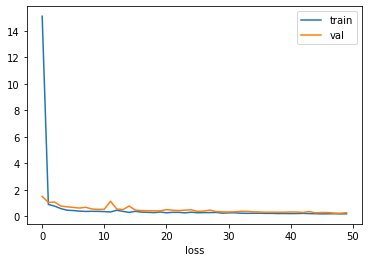

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.xlabel('loss')
plt.legend(['train','val'])
plt.show()


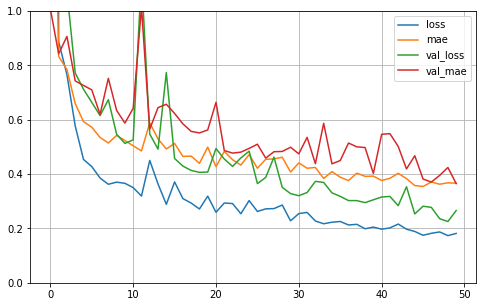

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
#Mexican 활성화 함수 추가한 결과
tf.random.set_seed(5)
layer=keras.layers.Dense(4, activation='relu',kernel_initializer='he_normal')
model=keras.Sequential([keras.layers.Dense(13, activation=mexican),
                        keras.layers.Dense(1, activation='linear')
])
opt=keras.optimizers.Adam(learning_rate=0.005)
model.compile(optimizer='SGD', loss='mean_squared_error',loss_weights=[0.9,0.1],metrics='mae')
history=model.fit(x_train,y_train,epochs=50, batch_size=10, validation_data=(x_test,y_test))

Epoch 1/50
8/8 [==============================] - 1s 22ms/step - loss: 54.5917 - mae: 7.4583 - val_loss: 31.8415 - val_mae: 5.7645
Epoch 2/50
8/8 [==============================] - 0s 4ms/step - loss: 28.7267 - mae: 5.2572 - val_loss: 11.8079 - val_mae: 3.4077
Epoch 3/50
8/8 [==============================] - 0s 5ms/step - loss: 6.3489 - mae: 2.2907 - val_loss: 2.0713 - val_mae: 1.2606
Epoch 4/50
8/8 [==============================] - 0s 4ms/step - loss: 2.3858 - mae: 1.3453 - val_loss: 0.9884 - val_mae: 0.8377
Epoch 5/50
8/8 [==============================] - 0s 7ms/step - loss: 1.4686 - mae: 1.0394 - val_loss: 0.7036 - val_mae: 0.6736
Epoch 6/50
8/8 [==============================] - 0s 4ms/step - loss: 0.9508 - mae: 0.8271 - val_loss: 0.4491 - val_mae: 0.5865
Epoch 7/50
8/8 [==============================] - 0s 4ms/step - loss: 0.7129 - mae: 0.6910 - val_loss: 0.3674 - val_mae: 0.5364
Epoch 8/50
8/8 [==============================] - 0s 4ms/step - loss: 0.5443 - mae: 0.6021 - val_lo

In [ ]:
#결과
val_mse, val_mae=model.evaluate(x_test, y_test)
val_mse, val_mae=model.evaluate(test, test_y_noise)

4/4 [==============================] - 0s 3ms/step - loss: 0.3256 - mae: 0.4941


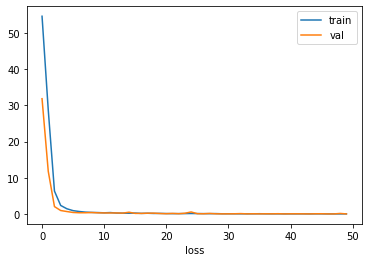

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.xlabel('loss')
plt.legend(['train','val'])
plt.show()


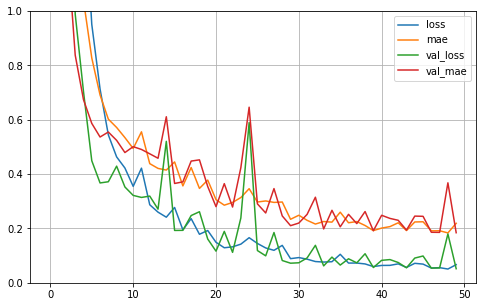

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
tf.random.set_seed(5)
# 옵티마이저
momentum=keras.optimizers.SGD(learning_rate=0.001,momentum=0.9)
nes=keras.optimizers.SGD(learning_rate=0.001,momentum=0.9, nesterov=True)
rmsprop=keras.optimizers.RMSprop(learning_rate=0.001,rho=0.9)
opt=keras.optimizers.Adam(learning_rate=0.005)
# Function to create model
def create_model(optimizer='Adam'):
	# create model
	model = Sequential()
	model.add(Dense(4, activation='relu', kernel_initializer='he_normal'))
	model.add(Dense(13, activation=mexican))
	# Compile model
	model.compile(loss='mse', optimizer=optimizer, metrics=['mae'])
	return model
# fix random seed for reproducibility
tf.random.set_seed(5)
model = KerasRegressor(build_fn=create_model, epochs=100, batch_size=10, verbose=0)
# define the grid search parameters
optimizer = ['SGD', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam','momentum','nes','opt']
param_grid = dict(optimizer=optimizer)
grid = GridSearchCV(estimator=model, param_grid=param_grid,n_jobs=-1, cv=3)
grid_result = grid.fit(x_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
#이 모델에서는 adam 옵티마이저가 가장 적합하다.

Best: -85.079002 using {'optimizer': 'Adam'}


#mexican 활성화 함수를 추가한 결과, 손실함수와 mae가 학습데이터, 검증데이터에서 현저히 줄어들며 데이터를 더 잘 예측할 수 있게 되었다.